# Cointegration Test in python

If a portfolio is stationary & the portfolio consist of two or more instruments. Then, the instruments in the portfolio are said to be cointegrated.
- 1st You need to check whether the portfolio is stationary or not, if yes, then the instruments in the portfolio are cointegrated     

Lets Consider two stocks X & Y
   - Hedge Ratio: Linear Regression X and Y
   - Spread: Y – Hedge Ratio*X
   - Stationarity Test (ADF test) on the spread
        

In [49]:
# Get the data
import pandas as pd
x = pd.read_csv('Desktop/X.csv',index_col=0)['Adj Close']
y = pd.read_csv('Desktop/Y.csv',index_col=0)['Adj Close']    
df = pd.concat([y,x],axis=1)
df.columns = ['Y','X']
df.head()

,Y,X
Date,,
02-01-2015,27.024069,19.254818
05-01-2015,26.298779,19.071854
06-01-2015,25.912586,18.993441
07-01-2015,25.940847,19.167692
08-01-2015,26.261103,19.420359


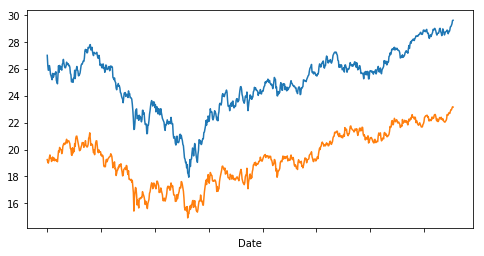

In [50]:
# Plot the prices series
import matplotlib.pyplot as plt
%matplotlib inline
df.Y.plot(figsize=(8,4))
df.X.plot(figsize=(8,4))
plt.show()

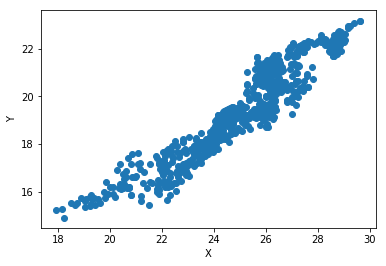

In [51]:
plt.scatter(df.Y,df.X)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [52]:
#Hedge Ratio
import statsmodels.api as sm
model = sm.OLS(df.Y.iloc[:90], df.X.iloc[:90])
model = model.fit() 
print(model.params[0])

1.3078067762939314


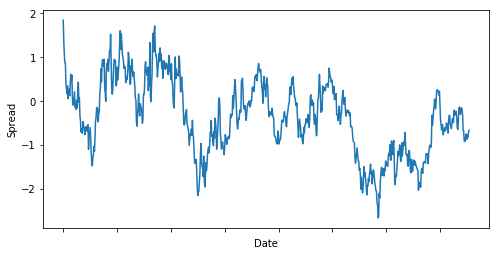

In [53]:
#Spread
df['spread'] = df.Y - model.params[0] * df.X
# Plot the spread
df.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

In [54]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(df.spread, maxlag = 1)
adf[0]

-4.117852561797964

In [41]:
adf[4]

{'1%': -3.4382915719823934,
 '10%': -2.568636586835826,
 '5%': -2.8650454292904577}

Conclusion: 
           Since -4.11 < -3.44, Portfolio is Stationarity and  X & Y is cointegrated with more than 99% certainty